# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

/home/naiara/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [3]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


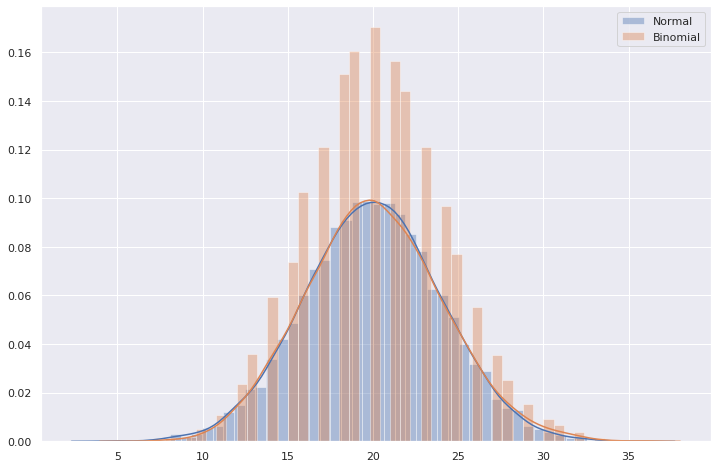

In [5]:
sns.distplot(dataframe.normal, label="Normal")
sns.distplot(dataframe.binomial, label="Binomial")
plt.xlabel("")
plt.legend();

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [ ]:
#da pra fazer assim tambem!!!!!
quartis = [np.quantile(dataframe.normal, i) - np.quantile(dataframe.binomial, i) for i in [0.25, 0.5, 0.75]]
tuple(np.round(quartis, 3))

In [6]:
# da pra fazer assim também:
df = dataframe.quantile((0.25,0.5,0.75))
df['sub'] = (df['normal'] - df['binomial'])
res = tuple(df['sub'].round(3))
res

(0.31, -0.01, -0.316)

In [7]:
def q1():
    q1_norm, q2_norm, q3_norm = dataframe.normal.quantile([0.25,0.5,0.75])
    q1_binom, q2_binom, q3_binom = dataframe.binomial.quantile([0.25,0.5,0.75])
    res = (round(q1_norm - q1_binom,3), round(q2_norm - q2_binom,3), round(q3_norm - q3_binom,3))
    return res

q1()

(0.31, -0.01, -0.316)

Existe uma diferença pequena entre os quartis das duas distribuções pois a distribuição Binomial se aproxima da distribuição Normal quanto maior o n (n>30), passando a variável  discreta  a  ter  o  mesmo  tratamento  que uma variável do tipo contínuo, com $\mu$= n.p e $\sigma$ = $\sqrt{np(1-p}$.

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [8]:
def q2():
    #Return the Empirical CDF of an array as a step function.
    ecdf = ECDF(dataframe.normal)
    # quero area acumulada da superior menos a área da inferior: ecdf(sup) - ecdf(inf)
    media = dataframe.normal.mean() 
    desvio = dataframe.normal.std()
    prob = ecdf(media+desvio) - ecdf(media-desvio)
    return float(prob.round(3))

q2()

0.684

In [9]:
#adicionalmente temos:
media = dataframe.normal.mean() 
desvio = dataframe.normal.std()
ecdf = ECDF(dataframe.normal)
print(ecdf(media+desvio) - ecdf(media-desvio))
print(ecdf(media+2*desvio) - ecdf(media-2*desvio))
print(ecdf(media+3*desvio) - ecdf(media-3*desvio))

0.6838
0.9538
0.9973000000000001


Os valores encontrados se aproximam dos valores teóricos para uma distribuição Normal: espera-se que no intervalo $\mu \pm \sigma$ esteja 68,26% dos dados, no intervalo $\mu \pm 2\sigma$ estejam 95,44% dos dados e em $\mu \pm 3\sigma$, 99,74%.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [10]:
def q3():
    m_norm = dataframe.normal.mean()
    v_norm = dataframe.normal.var()
    m_binom = dataframe.binomial.mean()
    v_binom = dataframe.binomial.var()
    res = (round(m_binom - m_norm,3), round(v_binom - v_norm,3))
    return res

q3()

(0.106, 0.22)

Existe uma diferença pequena entre os quartis das duas distribuções pois a distribuição Binomial se aproxima da distribuição Normal quanto maior o n (n>30), passando a variável  discreta  a  ter  o  mesmo  tratamento  que uma variável do tipo contínuo, com $\mu$= n.p e $\sigma$ = $\sqrt{np(1-p}$.

É possível perceber que, aumentando-se o n da distribuição Binomial, de 10.000 para 100.000, ela se aproxima mais da distribuição normal, diminuindo-se as diferenças.

In [11]:
np.random.seed(42)

binomial2 = sct.binom.rvs(100, 0.2, size=100000)
m_norm = dataframe.normal.mean()
v_norm = dataframe.normal.var()
m_binom = binomial2.mean()
v_binom = binomial2.var()
(round(m_binom - m_norm,3), round(v_binom - v_norm,3))

(-0.003, -0.196)

## Parte 2

### _Setup_ da parte 2

In [5]:
stars = pd.read_csv("pulsar_stars.csv", header=None)
stars.head()

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
stars.columns
stars[8].value_counts()

0    16259
1     1639
Name: 8, dtype: int64

In [7]:
stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [8]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,False
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False


In [9]:
stars.shape

(17898, 9)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [10]:
filtro = stars[stars['target'] == 0]['mean_profile']

padronizado = (filtro - filtro.mean()) / filtro.std()
ecdf = ECDF(padronizado)

In [11]:
Q_80 = sct.norm.ppf(0.80, loc=0, scale=1)
Q_90 = sct.norm.ppf(0.90, loc=0, scale=1)
Q_95 = sct.norm.ppf(0.95, loc=0, scale=1)

In [12]:
res = (round(ecdf(Q_80),3),round(ecdf(Q_90),3),round(ecdf(Q_95),3))
res

(0.806, 0.911, 0.959)

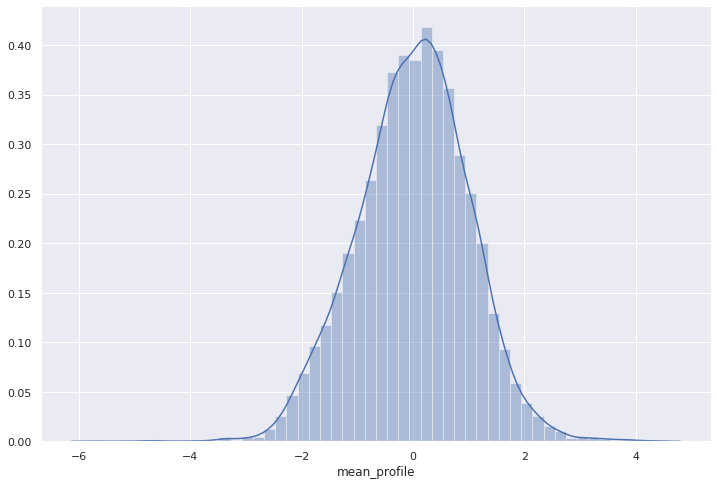

In [13]:
sns.distplot(padronizado);

In [15]:
def q4():
    #filtrando, padronizando e fazendo a ECDF
    filtro = stars[stars['target'] == 0]['mean_profile']
    padronizado = (filtro - filtro.mean()) / filtro.std()
    ecdf = ECDF(padronizado)
    #quartis para uma distribuição normal:
    Q_80, Q_90, Q_95 = sct.norm.ppf([0.80,0.90,0.95], loc=0, scale=1)
    #achando as porcentagens para esses quartis na minha função:
    return (round(ecdf(Q_80),3),round(ecdf(Q_90),3),round(ecdf(Q_95),3))

q4()

(0.806, 0.911, 0.959)

In [21]:
def q4():
    #filtrando, padronizando e fazendo a ECDF
    filtro = stars[stars['target'] == 0]['mean_profile']
    padronizado = (filtro - filtro.mean()) / filtro.std()
    ecdf = ECDF(padronizado)
    #quartis para uma distribuição normal:
    Q_80 = sct.norm.ppf(0.80, loc=0, scale=1)
    Q_90 = sct.norm.ppf(0.90, loc=0, scale=1)
    Q_95 = sct.norm.ppf(0.95, loc=0, scale=1)
    #achando as porcentagens para esses quartis na minha função:
    return (round(ecdf(Q_80),3),round(ecdf(Q_90),3),round(ecdf(Q_95),3))

q4()

(0.806, 0.911, 0.959)

Pelo gráfico já deu para perceber que a variável `padronizado` tem distribuição próxima à normal, logo, faz sentido os valores encontrados serem semelhantes aos valores originais de 80%, 90% e 95%.

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [22]:
padronizado

0        1.373304
1       -0.804244
2       -0.775186
3        1.155147
4       -1.592829
           ...   
17893    1.136818
17894    0.342869
17895    0.158687
17896   -0.117585
17897   -3.404695
Name: mean_profile, Length: 16259, dtype: float64

In [23]:
Q1, Q2, Q3 = padronizado.quantile([0.25,0.5,0.75])
Norm_Q1 = sct.norm.ppf(0.25, loc=0, scale=1)
Norm_Q2 = sct.norm.ppf(0.50, loc=0, scale=1)
Norm_Q3 = sct.norm.ppf(0.75, loc=0, scale=1)

In [24]:
res = (round(Q1-Norm_Q1,3),round(Q2-Norm_Q2,3),round(Q3-Norm_Q3,3))
res

(0.027, 0.04, -0.004)

In [25]:
def q5():
    #filtrando e padronizando
    filtro = stars[stars['target'] == 0]['mean_profile']
    padronizado = (filtro - filtro.mean()) / filtro.std()
    #os quartis da false_pulsar:
    Q1, Q2, Q3 = padronizado.quantile([0.25,0.5,0.75])
    #os quartis da normal:
    Norm_Q1 = sct.norm.ppf(0.25, loc=0, scale=1)
    Norm_Q2 = sct.norm.ppf(0.50, loc=0, scale=1)
    Norm_Q3 = sct.norm.ppf(0.75, loc=0, scale=1)
    return (round(Q1-Norm_Q1,3),round(Q2-Norm_Q2,3),round(Q3-Norm_Q3,3))

q5()

(0.027, 0.04, -0.004)

De novo, podemos perceber que essa variável tem distribuição Normal

* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.